## 🧠 Mental Health Treatment Prediction

Given *data about the mental health of employees in the tech industry*, let's try to predict whether a given subject has **sought treatment** in the past.

We will use Tensorflow ANN to make our predictions. 

Data source: https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

2025-02-23 12:16:16.376204: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv('survey.csv')
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,NaN


### Preprocessing

In [3]:
data.isna().mean()*100

Timestamp                     0.000000
Age                           0.000000
Gender                        0.000000
Country                       0.000000
state                        40.905481
self_employed                 1.429706
family_history                0.000000
treatment                     0.000000
work_interfere               20.969023
no_employees                  0.000000
remote_work                   0.000000
tech_company                  0.000000
benefits                      0.000000
care_options                  0.000000
wellness_program              0.000000
seek_help                     0.000000
anonymity                     0.000000
leave                         0.000000
mental_health_consequence     0.000000
phys_health_consequence       0.000000
coworkers                     0.000000
supervisor                    0.000000
mental_health_interview       0.000000
phys_health_interview         0.000000
mental_vs_physical            0.000000
obs_consequence          

In [4]:
data = data.drop('comments', axis=1)

In [5]:
data['self_employed'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [6]:
data['self_employed'].mode()

0    No
Name: self_employed, dtype: object

In [7]:
data['self_employed'] = data['self_employed'].fillna('No')

In [8]:
data.isna().sum()

Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        515
self_employed                  0
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [9]:
data['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [10]:
data['work_interfere'].mode()

0    Sometimes
Name: work_interfere, dtype: object

In [11]:
data['work_interfere'] = data['work_interfere'].fillna('Sometimes')

In [12]:
data.isna().sum()

Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        515
self_employed                  0
family_history                 0
treatment                      0
work_interfere                 0
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

### Feature Engineering

In [13]:
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,Female,United States,IL,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,M,United States,IN,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,Male,Canada,NaN,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,Male,United States,TX,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,Sometimes,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [14]:
data['Timestamp']

0       2014-08-27 11:29:31
1       2014-08-27 11:29:37
2       2014-08-27 11:29:44
3       2014-08-27 11:29:46
4       2014-08-27 11:30:22
               ...         
1254    2015-09-12 11:17:21
1255    2015-09-26 01:07:35
1256    2015-11-07 12:36:58
1257    2015-11-30 21:25:06
1258    2016-02-01 23:04:31
Name: Timestamp, Length: 1259, dtype: object

In [15]:
data['Year'] = data['Timestamp'].apply(lambda x: int(x[0:4]))
data['Month'] = data['Timestamp'].apply(lambda x: int(x[5:7]))
data['Day'] = data['Timestamp'].apply(lambda x: int(x[8:10]))
data['Hour'] = data['Timestamp'].apply(lambda x: int(x[11:13]))
data['Minute'] = data['Timestamp'].apply(lambda x: int(x[14:16]))
data['Second'] = data['Timestamp'].apply(lambda x: int(x[17:19]))
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Year,Month,Day,Hour,Minute,Second
0,2014-08-27 11:29:31,37,Female,United States,IL,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,2014,8,27,11,29,31
1,2014-08-27 11:29:37,44,M,United States,IN,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,2014,8,27,11,29,37
2,2014-08-27 11:29:44,32,Male,Canada,NaN,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,2014,8,27,11,29,44
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,2014,8,27,11,29,46
4,2014-08-27 11:30:22,31,Male,United States,TX,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,2014,8,27,11,30,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,2015,9,12,11,17,21
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,2015,9,26,1,7,35
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,2015,11,7,12,36,58
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,Sometimes,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,2015,11,30,21,25,6


In [16]:
data = data.drop('Timestamp', axis=1)

### Encoding Features

In [17]:
{column: len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Gender': 49,
 'Country': 48,
 'state': 46,
 'self_employed': 2,
 'family_history': 2,
 'treatment': 2,
 'work_interfere': 4,
 'no_employees': 6,
 'remote_work': 2,
 'tech_company': 2,
 'benefits': 3,
 'care_options': 3,
 'wellness_program': 3,
 'seek_help': 3,
 'anonymity': 3,
 'leave': 5,
 'mental_health_consequence': 3,
 'phys_health_consequence': 3,
 'coworkers': 3,
 'supervisor': 3,
 'mental_health_interview': 3,
 'phys_health_interview': 3,
 'mental_vs_physical': 3,
 'obs_consequence': 2}

In [18]:
{column: list(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Gender': ['Female',
  'M',
  'Male',
  'male',
  'female',
  'm',
  'Male-ish',
  'maile',
  'Trans-female',
  'Cis Female',
  'F',
  'something kinda male?',
  'Cis Male',
  'Woman',
  'f',
  'Mal',
  'Male (CIS)',
  'queer/she/they',
  'non-binary',
  'Femake',
  'woman',
  'Make',
  'Nah',
  'All',
  'Enby',
  'fluid',
  'Genderqueer',
  'Female ',
  'Androgyne',
  'Agender',
  'cis-female/femme',
  'Guy (-ish) ^_^',
  'male leaning androgynous',
  'Male ',
  'Man',
  'Trans woman',
  'msle',
  'Neuter',
  'Female (trans)',
  'queer',
  'Female (cis)',
  'Mail',
  'cis male',
  'A little about you',
  'Malr',
  'p',
  'femail',
  'Cis Man',
  'ostensibly male, unsure what that really means'],
 'Country': ['United States',
  'Canada',
  'United Kingdom',
  'Bulgaria',
  'France',
  'Portugal',
  'Netherlands',
  'Switzerland',
  'Poland',
  'Australia',
  'Germany',
  'Russia',
  'Mexico',
  'Brazil',
  'Slovenia',
  'Costa Rica',
  'Austria',
  'Ireland',
  'India',
  'South Afric

In [19]:
def encode_gender(x):
    if x.lower()[0] == 'f':
        return 0
    elif x.lower()[0] == 'm':
        return 1
    else:
        return 2

In [20]:
data['Gender'] = data['Gender'].apply(encode_gender)

In [21]:
{column: list(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Country': ['United States',
  'Canada',
  'United Kingdom',
  'Bulgaria',
  'France',
  'Portugal',
  'Netherlands',
  'Switzerland',
  'Poland',
  'Australia',
  'Germany',
  'Russia',
  'Mexico',
  'Brazil',
  'Slovenia',
  'Costa Rica',
  'Austria',
  'Ireland',
  'India',
  'South Africa',
  'Italy',
  'Sweden',
  'Colombia',
  'Latvia',
  'Romania',
  'Belgium',
  'New Zealand',
  'Zimbabwe',
  'Spain',
  'Finland',
  'Uruguay',
  'Israel',
  'Bosnia and Herzegovina',
  'Hungary',
  'Singapore',
  'Japan',
  'Nigeria',
  'Croatia',
  'Norway',
  'Thailand',
  'Denmark',
  'Bahamas, The',
  'Greece',
  'Moldova',
  'Georgia',
  'China',
  'Czech Republic',
  'Philippines'],
 'state': ['IL',
  'IN',
  nan,
  'TX',
  'TN',
  'MI',
  'OH',
  'CA',
  'CT',
  'MD',
  'NY',
  'NC',
  'MA',
  'IA',
  'PA',
  'WA',
  'WI',
  'UT',
  'NM',
  'OR',
  'FL',
  'MN',
  'MO',
  'AZ',
  'CO',
  'GA',
  'DC',
  'NE',
  'WV',
  'OK',
  'KS',
  'VA',
  'NH',
  'KY',
  'AL',
  'NV',
  'NJ',
  'SC',

In [22]:
target = 'treatment'

binary_features = [
    'self_employed', 
    'family_history', 
    'remote_work', 
    'tech_company', 
    'obs_consequence'
]

ordinal_features = [
    'work_interfere', 
    'no_employees'
]

nominal_features = [
    'Country', 
    'state', 
    'benefits', 
    'care_options', 
    'wellness_program', 
    'seek_help', 
    'anonymity', 
    'leave', 
    'mental_health_consequence', 
    'phys_health_consequence',
    'coworkers',
    'supervisor',
    'mental_health_interview',
    'phys_health_interview',
    'mental_vs_physical'
]

In [25]:
def binary_encode(df, columns, positive_values):
    df = df.copy()
    for column, positive_value in zip(columns, positive_values):
        df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def ordinal_encode(df, columns, orderings):
    df = df.copy()
    for column, ordering in zip(columns, orderings):
        df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

def nominal_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [26]:
binary_positive_values = ['Yes' for feature in binary_features]

ordinal_orderings = [
    ['Never', 'Rarely', 'Sometimes', 'Often'],
    ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
]

nominal_prefixes = [
    'co',
    'st',
    're',
    'be',
    'ca',
    'we',
    'se',
    'an',
    'le',
    'mc',
    'ph',
    'cw',
    'su',
    'mi',
    'pi',
    'mp'
]

In [27]:
data = binary_encode(
    data,
    binary_features,
    binary_positive_values
)

In [28]:
data = nominal_encode(
    data,
    nominal_features,
    nominal_prefixes
)

In [29]:
data = ordinal_encode(
    data,
    ordinal_features,
    ordinal_orderings
)

In [30]:
data

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,obs_consequence,Year,Month,Day,Hour,Minute,Second,co_Australia,co_Austria,"co_Bahamas, The",co_Belgium,co_Bosnia and Herzegovina,co_Brazil,co_Bulgaria,co_Canada,co_China,co_Colombia,co_Costa Rica,co_Croatia,co_Czech Republic,co_Denmark,co_Finland,co_France,co_Georgia,co_Germany,co_Greece,co_Hungary,co_India,co_Ireland,co_Israel,co_Italy,co_Japan,co_Latvia,co_Mexico,co_Moldova,co_Netherlands,co_New Zealand,co_Nigeria,co_Norway,co_Philippines,co_Poland,co_Portugal,co_Romania,co_Russia,co_Singapore,co_Slovenia,co_South Africa,co_Spain,co_Sweden,co_Switzerland,co_Thailand,co_United Kingdom,co_United States,co_Uruguay,co_Zimbabwe,st_AL,st_AZ,st_CA,st_CO,st_CT,st_DC,st_FL,st_GA,st_IA,st_ID,st_IL,st_IN,st_KS,st_KY,st_LA,st_MA,st_MD,st_ME,st_MI,st_MN,st_MO,st_MS,st_NC,st_NE,st_NH,st_NJ,st_NM,st_NV,st_NY,st_OH,st_OK,st_OR,st_PA,st_RI,st_SC,st_SD,st_TN,st_TX,st_UT,st_VA,st_VT,st_WA,st_WI,st_WV,st_WY,re_Don't know,re_No,re_Yes,be_No,be_Not sure,be_Yes,ca_Don't know,ca_No,ca_Yes,we_Don't know,we_No,we_Yes,se_Don't know,se_No,se_Yes,an_Don't know,an_Somewhat difficult,an_Somewhat easy,an_Very difficult,an_Very easy,le_Maybe,le_No,le_Yes,mc_Maybe,mc_No,mc_Yes,ph_No,ph_Some of them,ph_Yes,cw_No,cw_Some of them,cw_Yes,su_Maybe,su_No,su_Yes,mi_Maybe,mi_No,mi_Yes,pi_Don't know,pi_No,pi_Yes
0,37,0,0,0,Yes,3,1,0,1,0,2014,8,27,11,29,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,True,False,False,False,False,True
1,44,1,0,0,No,1,5,0,0,0,2014,8,27,11,29,37,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False
2,32,1,0,0,No,1,1,0,1,0,2014,8,27,11,29,44,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False
3,31,1,0,1,Yes,3,2,0,1,1,2014,8,27,11,29,46,False,False,False,False,False,False,False,False,False,False,F

In [31]:
data.select_dtypes('object')

,treatment
0,Yes
1,No
2,No
3,Yes
4,No
...,...
1254,Yes
1255,Yes
1256,Yes
1257,No


### Encoding Labels

In [32]:
data = binary_encode(
    data,
    columns=['treatment'],
    positive_values=['Yes']
)

In [36]:
print("Remaining non-numeric columns:", len(data.select_dtypes('object').columns))

Remaining non-numeric columns: 0


In [38]:
print("Remaining missing values:", data.isna().sum().sum())

Remaining missing values: 0


### Splitting/Scaling

In [39]:
y = data['treatment'].copy()
X = data.drop('treatment', axis=1).copy()

In [40]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

### Training

In [42]:
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(1024, activation='relu')(inputs)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

2025-02-23 13:11:13.534671: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [44]:
print("Class Distribution (Positive to Negative): {:.1f}% / {:.1f}%".format(y_train.mean()*100, (1 - y_train.mean())*100))

Class Distribution (Positive to Negative): 49.7% / 50.3%


In [46]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy', 
        tf.keras.metrics.AUC(name='auc')
    ]
)

In [47]:
batch_size = 64
epochs = 50

history = model.fit(
    X_train, 
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/50
11/11 [==============================] - 2s 64ms/step - loss: 0.7720 - accuracy: 0.6023 - auc: 0.6410 - val_loss: 0.7562 - val_accuracy: 0.6215 - val_auc: 0.6501 - lr: 0.0010
Epoch 2/50
11/11 [==============================] - 0s 28ms/step - loss: 0.4969 - accuracy: 0.7798 - auc: 0.8430 - val_loss: 0.6762 - val_accuracy: 0.6215 - val_auc: 0.6887 - lr: 0.0010
Epoch 3/50
11/11 [==============================] - 0s 26ms/step - loss: 0.3594 - accuracy: 0.8452 - auc: 0.9274 - val_loss: 0.7530 - val_accuracy: 0.6045 - val_auc: 0.6945 - lr: 0.0010
Epoch 4/50
11/11 [==============================] - 0s 31ms/step - loss: 0.2792 - accuracy: 0.8793 - auc: 0.9581 - val_loss: 0.8973 - val_accuracy: 0.6328 - val_auc: 0.6802 - lr: 0.0010
Epoch 5/50
11/11 [==============================] - 0s 27ms/step - loss: 0.2129 - accuracy: 0.9318 - auc: 0.9801 - val_loss: 0.9409 - val_accuracy: 0.6441 - val_auc: 0.6890 - lr: 0.0010
Epoch 6/50
11/11 [==============================] - 0s 26ms/step - los

### Results

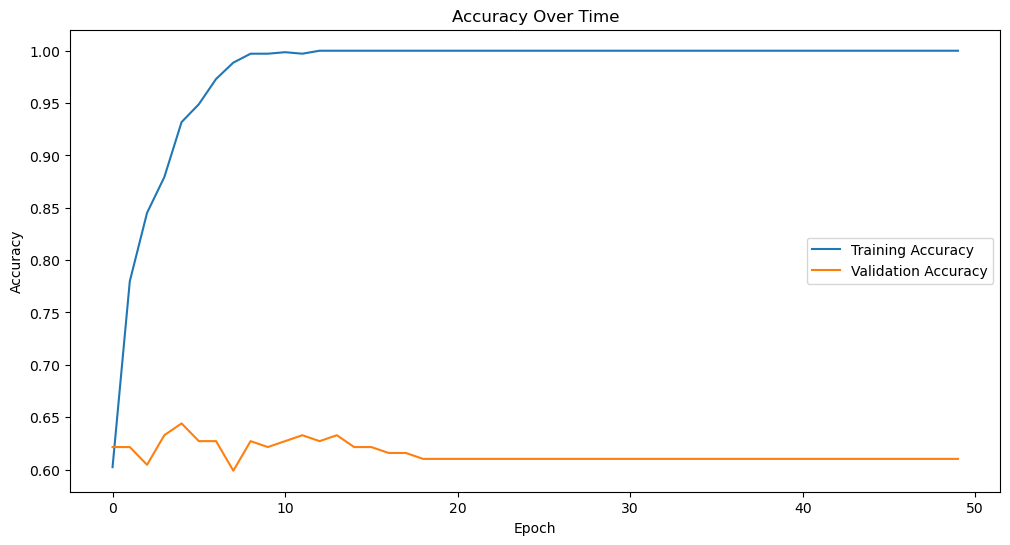

In [48]:
plt.figure(figsize=(12,6))

plt.plot(range(epochs), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(epochs), history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.title('Accuracy Over Time')
plt.show()

In [49]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 5ms/step - loss: 1.7904 - accuracy: 0.6772 - auc: 0.7130


[1.7904088497161865, 0.6772486567497253, 0.7129783034324646]